<a href="https://colab.research.google.com/github/Modequick/Machine-Learning-Project/blob/main/A/B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import and other boring stuff

In [97]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/cookie_cats.csv")

In [99]:
print("The length of the dataset is :" ,len(df),"Rows")
df.head()


The length of the dataset is : 90189 Rows


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Background 

Currently Cookie Cats, a huge popular mobile puzzle game developed by Tactile Entertainment is doing A/B Testing for their games. Cookie cats want to move the level from level 30 to level 40  in which players encounter gates that force them to wait some time before they can progress or make an in-app purchase. Cookie cats currently think that higher level are more likely to return and made purchase due to user knowledge/experience and user awareness about the game that could accelerate their level.

## Objective 
Analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30(control) to level 40(treatment). In particular, I will analyze the impact on player retention and game rounds.


caveats : there is no date in here.


# Data understanding 

In [100]:
df["version"].value_counts() *100  /len(df)
#Checking the proportion control and treatment of the data 

gate_40    50.437415
gate_30    49.562585
Name: version, dtype: float64

In [101]:
df["retention_1"].value_counts() * 100 /len(df)
#Checking retention for 1 day after installing

False    55.47905
True     44.52095
Name: retention_1, dtype: float64

In [102]:
df["retention_7"].value_counts() * 100 / len(df)
#Checking retention for 7 day after installing

False    81.393518
True     18.606482
Name: retention_7, dtype: float64

Text(0.5, 0.98, 'ploting gameround --found outliers')

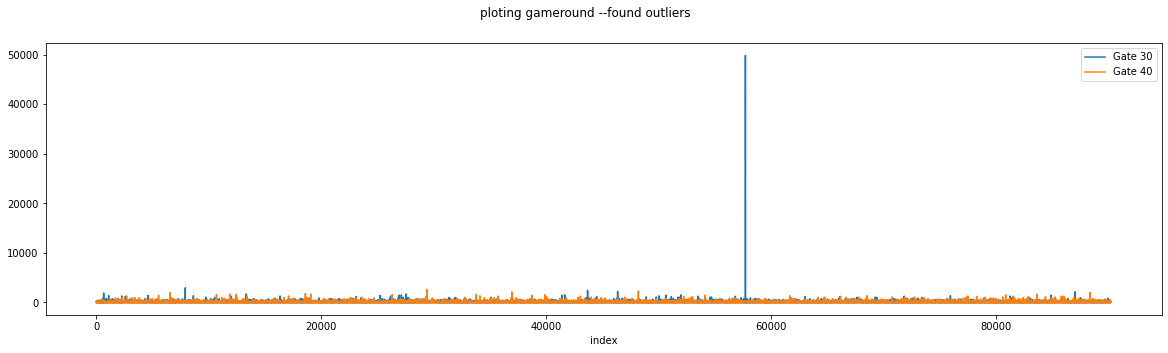

In [103]:
df[df.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
df[df.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40", figsize = (20,5))

plt.suptitle("ploting gameround --found outliers")

In [104]:
df["sum_gamerounds"].sort_values(ascending=False).head()

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
Name: sum_gamerounds, dtype: int64

In [105]:
#selecing non outliers data 
df = df[df["sum_gamerounds"] != df["sum_gamerounds"].max()]
# df = df[df["sum_gamerounds"] <=  500]


Text(0.5, 0.98, 'ploting sum_gameround')

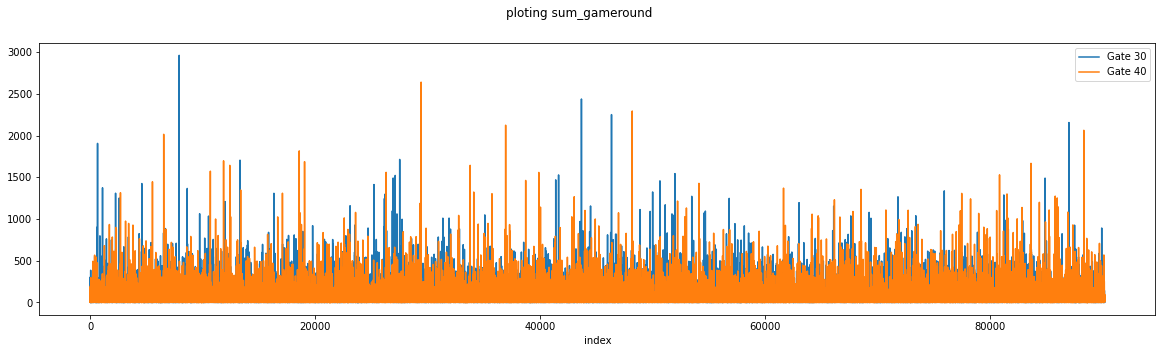

In [106]:
df[df.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
df[df.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40", figsize = (20,5))

plt.suptitle("ploting sum_gameround")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

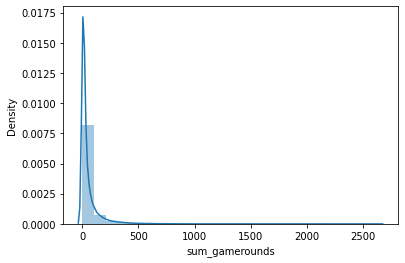

In [107]:
#plotting distribution of each gate 
bins = 25 
sns.distplot(df["sum_gamerounds"][df["version"] == "gate_40"] , bins = bins)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

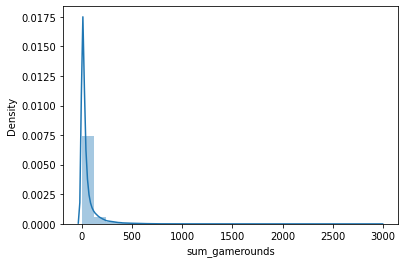

In [108]:
sns.distplot(df["sum_gamerounds"][df["version"] == "gate_30"], bins = bins)